In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
from pandas.errors import SettingWithCopyWarning
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [153]:
df_netflix=pd.read_csv('Netflix.csv', index_col=0)
df_netflixIMDB=pd.read_csv('Imdb.csv', index_col=0)

In [154]:
df_netflix.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s3790,TV Show,Killer Ratings,NaN,NaN,NaN,"May 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Brazilian TV personality and politician Wallac...
s2470,Movie,Ne Zha,Yu Yang,"Lü Yanting, Joseph, Han Mo, Chen Hao, Lü Qi, Z...",China,"May 25, 2020",2019,TV-14,110 min,"Action & Adventure, Comedies, International Mo...","Bound by a divine mandate, rebellious outcast ..."
s2091,Movie,Edge of Seventeen,David Moreton,"Chris Stafford, Tina Holmes, Andersen Gabrych,...",United States,"August 27, 2020",1998,TV-MA,103 min,"Comedies, Dramas, Independent Movies",A 17-year-old confronts confusion and heartbre...
s3805,Movie,The Man Who Feels No Pain,Vasan Bala,"Abhimanyu Dassani, Radhika Madan, Gulshan Deva...",India,"May 22, 2019",2018,TV-14,137 min,"Action & Adventure, Comedies, International Mo...","Leveraging his ability to withstand pain, a yo..."
s7122,Movie,Jay and Silent Bob Strike Back,Kevin Smith,"Jason Mewes, Kevin Smith, Ben Affleck, Jeff An...",United States,"January 1, 2019",2001,R,105 min,"Comedies, Cult Movies",Jay and Silent Bob's comic book alter egos hav...


In [155]:
df_netflixIMDB.sample(2)

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
1340,ts42257,Signal,SHOW,â€¨Detectives from the present and a detective...,2016,TV-MA,71,tt5332206,8.6,6338.0
4056,tm918960,The Magic School Bus Rides Again: Kids in Space,MOVIE,The Magic School Bus kids blast into orbit - a...,2020,NaN,45,tt12730310,5.9,81.0


In [156]:
df_netflixcompleto= df_netflix.merge(df_netflixIMDB, on='title') 

In [157]:
# Función para aplicar un EDA básico
def eda_basico(df):
    print("========== RESUMEN GENERAL ==========")
    print("Dimensiones:")
    print(F"Este DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas." , "\n")
    print()
    print()
    print('-----------------------------------------------------')
    print("Información general:")
    display(df.info())
    print()
    print()
    print('-----------------------------------------------------')
    print("Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print()
    print()
    print('-----------------------------------------------------')
    
    print("\n========== DESCRIBES ==========")
    print("Descripción de columnas numéricas:")
    display(df.describe().T)
    print()
    print()
    print('-----------------------------------------------------')

    print("Descripción de columnas categóricas:")
    try:
        display(df.describe(include=['O']))
    except ValueError:
        print("No se existen columnas categóricas en este DataFrame.")
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== MUESTRAS ==========")
    print("Primeras filas del DataFrame:")
    display(df.head())
    print()
    print()
    print("Últimas filas del DataFrame:")
    display(df.tail(5))
    print()
    print()
    print("Cinco filas aleatorias del DataFrame:")
    display(df.sample(5))
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== VALUE COUNTS (por columna categórica) ==========")
    col_categoricas =  df.select_dtypes(include=["object", "category"]).columns.tolist()

    if col_categoricas:
        for c in col_categoricas:
            print(f"\n--- {c} ---")
            print(df[c].value_counts)
    else:
        print("No se puede realizar la función .value_counts ya que no existen columnas categóricas.")
    print('-----------------------------------------------------')

    print("\n========== NULOS ==========")
    print("Valores nulos por columna:")
    if df.isnull().sum().any():
        print("Estas son las columnas en las que hay valores nulos:")
        print(display(df.isnull().sum()))
    else:
        print("No hay valores nulos en este DataFrame.")
    print()
    print("Dataframe de valores nulos:")
    porcentaje_nulos = (df_netflixcompleto.isnull().sum() / df_netflixcompleto.shape[0]) * 100
    total_nulos = df_netflixcompleto.isnull().sum()
    df_nulos = pd.DataFrame({
        "Total nulos": total_nulos,
        "Porcentaje nulos": porcentaje_nulos,
        "Tipo de dato": df_netflixcompleto.dtypes})
    df_nulos["Tipo de dato"] = df_netflixcompleto.dtypes
    df_nulos = df_nulos[df_nulos["Porcentaje nulos"] > 0].round(2).reset_index().sort_values(by="Porcentaje nulos", ascending=False)
    df_nulos.columns = ["Columna", "Total nulos", "Porcentaje nulos", "Tipo de dato"]
    display(df_nulos)
    print('-----------------------------------------------------')

    print("\n========== DUPLICADOS ==========")
    print("Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Hay {dup_count} filas duplicadas.")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")
    print('-----------------------------------------------------')

    print("\n========== HISTOGRAMAS NUMÉRICOS ==========")
    df.hist(bins=20, figsize=(25,25))
    plt.show()
    print('-----------------------------------------------------')
   

========== RESUMEN GENERAL ==========
Dimensiones:
Este DataFrame tiene 3790 filas y 20 columnas. 



-----------------------------------------------------
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type_x             3790 non-null   object 
 1   title              3790 non-null   object 
 2   director           2428 non-null   object 
 3   cast               3438 non-null   object 
 4   country            3508 non-null   object 
 5   date_added         3790 non-null   object 
 6   release_year_x     3790 non-null   int64  
 7   rating             3790 non-null   object 
 8   duration           3789 non-null   object 
 9   listed_in          3790 non-null   object 
 10  description_x      3790 non-null   object 
 11  id                 3790 non-null   object 
 12  type_y             3790 non-null   obje

None



-----------------------------------------------------
Tipos de datos por columna:
type_x                object
title                 object
director              object
cast                  object
country               object
date_added            object
release_year_x         int64
rating                object
duration              object
listed_in             object
description_x         object
id                    object
type_y                object
description_y         object
release_year_y         int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object 



-----------------------------------------------------

========== DESCRIBES ==========
Descripción de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
release_year_x,3790.0,2016.421372,6.747219,1954.0,2016.0,2018.0,2020.0,2021.0
release_year_y,3790.0,2015.936939,6.982275,1953.0,2016.0,2018.0,2019.0,2022.0
runtime,3790.0,78.672296,39.169462,0.0,45.0,86.0,105.0,229.0
imdb_score,3790.0,6.545884,1.163679,1.5,5.8,6.6,7.4,9.6
imdb_votes,3785.0,21530.815852,81830.014108,5.0,616.0,2565.0,10517.0,2268288.0




-----------------------------------------------------
Descripción de columnas categóricas:


,type_x,title,director,cast,country,date_added,rating,duration,listed_in,description_x,id,type_y,description_y,age_certification,imdb_id
count,3790,3790,2428,3438,3508,3790,3790,3789,3790,3790,3790,3790,3787,2151,3790
unique,2,3747,1949,3319,397,1199,13,173,370,3747,3790,2,3787,11,3790
top,Movie,The Gift,Marcus Raboy,Jeff Dunham,United States,"January 1, 2020",TV-MA,1 Season,Stand-Up Comedy,A painter in Istanbul embarks on a personal jo...,tm845484,MOVIE,"With this inventive portrait, director Kirsten...",TV-MA,tt11394180
freq,2358,3,14,7,1241,35,1754,878,205,3,1,2361,1,600,1




-----------------------------------------------------

========== MUESTRAS ==========
Primeras filas del DataFrame:


,type_x,title,director,cast,country,date_added,release_year_x,rating,duration,listed_in,description_x,id,type_y,description_y,release_year_y,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",tm845484,MOVIE,"With this inventive portrait, director Kirsten...",2020,PG-13,89,tt11394180,7.4,6390.0
1,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,ts304058,SHOW,"Mehdi, a qualified robber, and Liana, an appre...",2021,TV-MA,46,tt13278100,7.0,2460.0
2,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",ts308053,SHOW,"Feuds, flirtations and toilet talk go down amo...",2021,TV-MA,41,tt15320436,6.6,205.0
3,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,ts90621,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,tt9432978,9.3,66985.0
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,ts215951,SHOW,An isolated island community experiences mirac...,2021,TV-MA,64,tt10574558,7.7,102321.0




Últimas filas del DataFrame:


,type_x,title,director,cast,country,date_added,release_year_x,rating,duration,listed_in,description_x,id,type_y,description_y,release_year_y,age_certification,runtime,imdb_id,imdb_score,imdb_votes
3785,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,"April 1, 2020",2010,PG-13,121 min,Dramas,Director David Fincher's biographical drama ch...,tm86803,MOVIE,The tale of a new breed of cultural insurgent:...,2010,PG-13,121,tt1285016,7.8,681286.0
3786,Movie,The Texas Chainsaw Massacre,Tobe Hooper,"Gunnar Hansen, Jim Siedow, Marilyn Burns, Edwi...",United States,"October 22, 2019",1974,R,83 min,"Cult Movies, Horror Movies, Independent Movies",When some friends visit a vandalized graveyard...,tm137362,MOVIE,After picking up a traumatized young hitchhike...,2003,R,98,tt0324216,6.2,140741.0
3787,Movie,True Grit,Henry Hathaway,"John Wayne, Glen Campbell, Kim Darby, Jeremy S...",United States,"January 1, 2020",1969,G,128 min,"Classic Movies, Dramas",Teenage tomboy Mattie Ross enlists the help of...,tm90190,MOVIE,Following the murder of her father by a hired ...,2010,PG-13,110,tt1403865,7.6,333378.0
3788,Movie,We the Animals,Jeremiah Zagar,"Evan Rosado, Josiah Gabriel, Isaiah Kristian, ...",United States,"February 11, 2019",2018,R,93 min,"Dramas, Independent Movies",A trio of brothers cope with their parents' vo...,tm370232,MOVIE,"Manny, Joel and Jonah tear their way through c...",2018,R,94,tt7681824,6.9,4181.0
3789,Movie,World Trade Center,Oliver Stone,"Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...",United States,"November 20, 2019",2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ...",tm36644,MOVIE,Two police officers struggle to survive when t...,2006,PG-13,129,tt0469641,6.0,83129.0




Cinco filas aleatorias del DataFrame:


,type_x,title,director,cast,country,date_added,release_year_x,rating,duration,listed_in,description_x,id,type_y,description_y,release_year_y,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1890,TV Show,Thieves of the Wood,NaN,"Matteo Simoni, Tom Van Dyck, Stef Aerts, Anne-...",Belgium,"January 2, 2020",2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",Charismatic highwayman Jan de Lichte leads the...,ts131579,SHOW,In 18th-century Flanders a soldier-turned-band...,2018,TV-MA,47,tt5766086,6.8,2533.0
1466,TV Show,Trotro,NaN,NaN,France,"July 1, 2020",2004,TV-Y,1 Season,Kids' TV,"Trotro the donkey may be opinionated, but he's...",ts37200,SHOW,Trotro is a little donkey with a head full of ...,2004,TV-G,3,tt1074443,6.2,120.0
3722,Movie,Casino Royale,Martin Campbell,"Daniel Craig, Judi Dench, Eva Green, Jeffrey W...","United Kingdom, Czech Republic, United States,...","August 31, 2020",2006,PG-13,145 min,Action & Adventure,Daniel Craig makes his debut as the newly mint...,tm39030,MOVIE,"Le Chiffre, a banker to the world's terrorists...",2006,NaN,139,tt0381061,8.0,644336.0
1104,Movie,Rebecca,Ben Wheatley,"Lily James, Armie Hammer, Kristin Scott Thomas...",United Kingdom,"October 21, 2020",2020,PG-13,123 min,"Dramas, Romantic Movies, Thrillers",A young newlywed moves to her husband's imposi...,tm443615,MOVIE,After a whirlwind romance with a wealthy widow...,2020,PG-13,121,tt2235695,6.0,40447.0
3517,Movie,Daniel Sosa: Sosafado,"Raúl Campos, Jan Suter",Daniel Sosa,Mexico,"February 3, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian Daniel Sosa inhabits various characte...,tm305227,MOVIE,His limitless imagination and effortless trans...,2017,NaN,77,tt6502534,5.4,98.0




-----------------------------------------------------

========== VALUE COUNTS (por columna categórica) ==========

--- type_x ---
<bound method IndexOpsMixin.value_counts of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
5         Movie
6         Movie
7       TV Show
8         Movie
9       TV Show
10      TV Show
11        Movie
12      TV Show
13      TV Show
14      TV Show
15        Movie
16      TV Show
17      TV Show
18      TV Show
19        Movie
20      TV Show
21        Movie
22        Movie
23        Movie
24        Movie
25      TV Show
26      TV Show
27      TV Show
28        Movie
29        Movie
30        Movie
31      TV Show
32      TV Show
33      TV Show
34      TV Show
35        Movie
36        Movie
37      TV Show
38      TV Show
39        Movie
40      TV Show
41      TV Show
42        Movie
43      TV Show
44        Movie
45      TV Show
46        Movie
47        Movie
48      TV Show
49      TV Show
50        Movie
51     

type_x                  0
title                   0
director             1362
cast                  352
country               282
date_added              0
release_year_x          0
rating                  0
duration                1
listed_in               0
description_x           0
id                      0
type_y                  0
description_y           3
release_year_y          0
age_certification    1639
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes              5
dtype: int64

None

Dataframe de valores nulos:


,Columna,Total nulos,Porcentaje nulos,Tipo de dato
5,age_certification,1639,43.25,object
0,director,1362,35.94,object
1,cast,352,9.29,object
2,country,282,7.44,object
6,imdb_votes,5,0.13,float64
4,description_y,3,0.08,object
3,duration,1,0.03,object


-----------------------------------------------------

========== DUPLICADOS ==========
Filas duplicadas:
Hay 0 filas duplicadas.
No hay filas duplicadas.

-----------------------------------------------------

========== HISTOGRAMAS NUMÉRICOS ==========


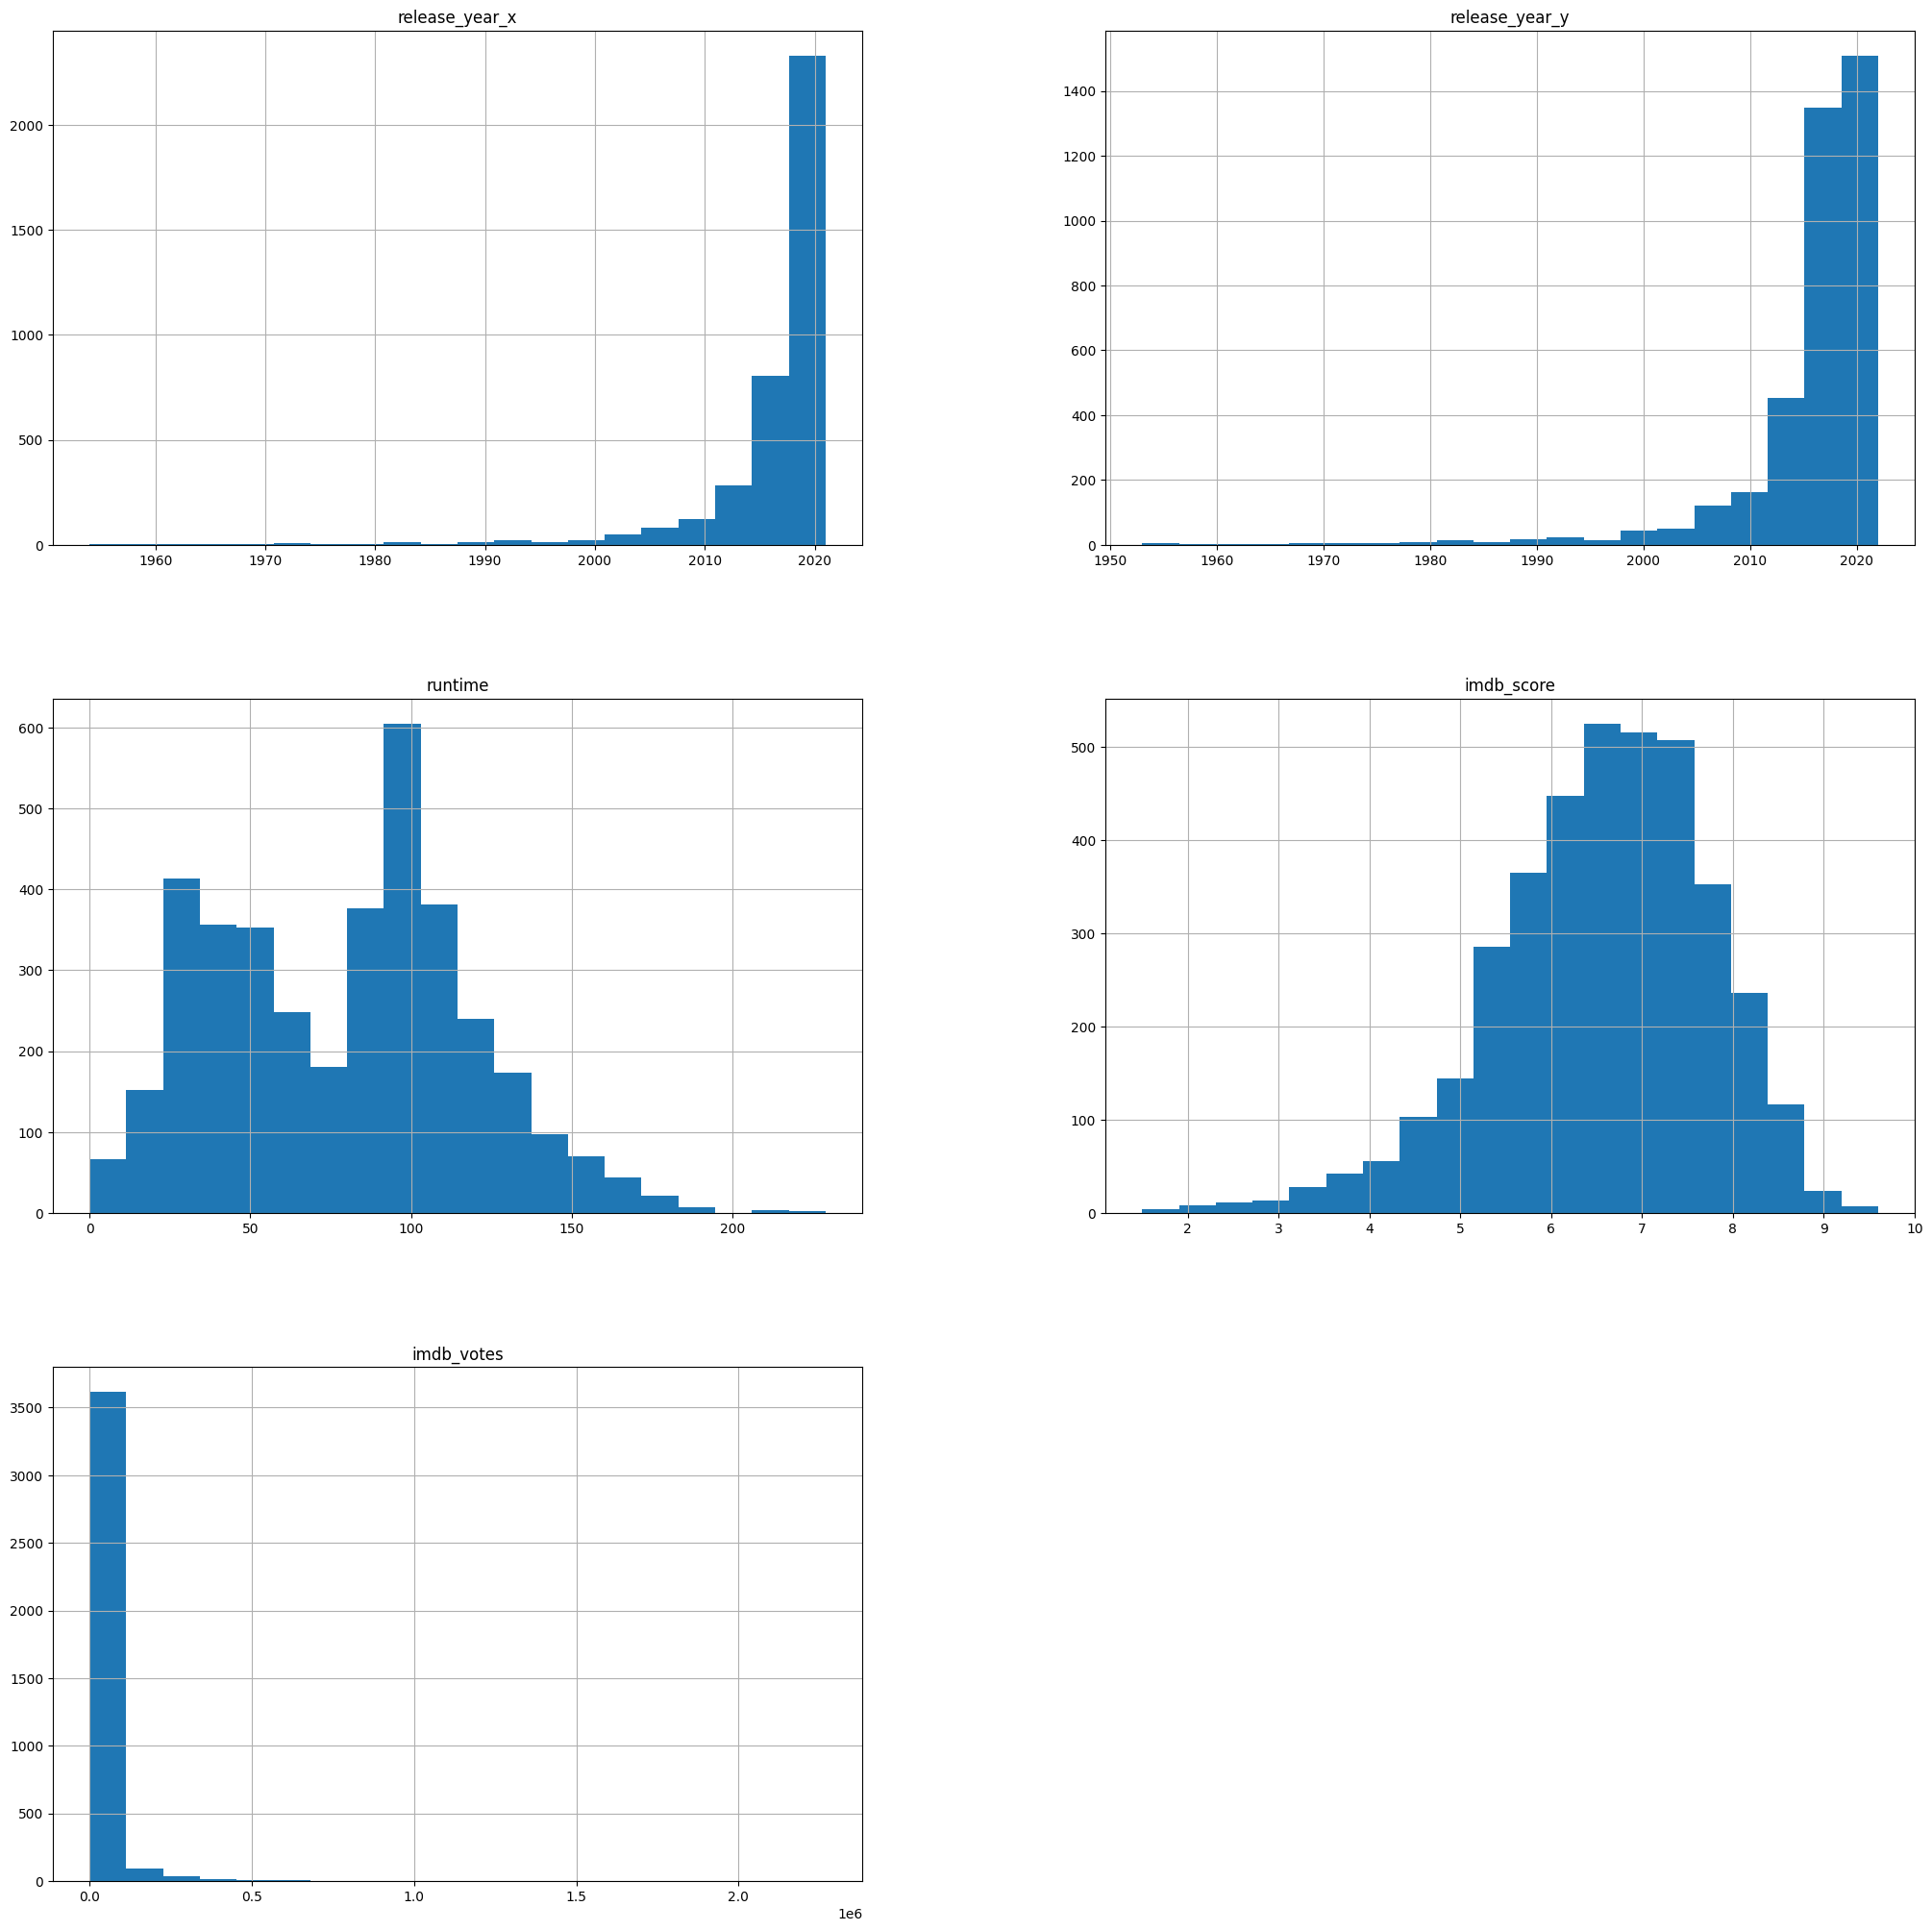

-----------------------------------------------------


In [158]:
eda_basico(df_netflixcompleto)

In [159]:
#Funcion de limpieza
def limpieza(df):
    """
    Realiza una limpieza mínima del DataFrame df_netflixcompleto:
      - Elimina columnas duplicadas o reinterantes.
      - Renombra columnas con sufijos '_x' y '_y' / Renombra 'cast' a 'casting' / renombra 'listed_in' en 'genres'.
    """

    print("========== LIMPIEZA MÍNIMA ==========")
    
    # Eliminamos las columnas innecesarias (si existen)
    columnas_a_eliminar = ['type_y', 'release_year_x', 'description_x', 'id', 'imdb_id', 'runtime','age_certification']
    columnas_presentes = [c for c in columnas_a_eliminar if c in df.columns]
    if columnas_presentes:
        df.drop(columns=columnas_presentes, axis=1, inplace=True)
        print(f"Columnas eliminadas: {columnas_presentes}")
    else:
        print("No se encontraron columnas a eliminar.")
    # Renombramos columnas
    columnas_renombrar = {
        'type_x': 'type',
        'release_year_y': 'release_year',
        'description_y': 'description',
        'cast' : 'casting',
        'listed_in' : 'genres'
    }
    existentes = {k: v for k, v in columnas_renombrar.items() if k in df.columns}
    if existentes:
        df.rename(columns=existentes, inplace=True)
        print(f"Columnas renombradas: {existentes}")
    else:
        print("No había columnas para renombrar.")

    # Capitalizamos y borramos barras bajas
    df.columns = [col.replace('_', ' ').title() for col in df.columns]
    print("Columnas capitalizadas y limpiadas de barras bajas.")


    print("Limpieza mínima completada.")
    print(f"Dimensiones actuales: {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print("Ahora mismo, un ejemplo de tu DataSet sería:")

    return df.sample(5)



In [160]:
limpieza(df_netflixcompleto)

========== LIMPIEZA MÍNIMA ==========
Columnas eliminadas: ['type_y', 'release_year_x', 'description_x', 'id', 'imdb_id', 'runtime', 'age_certification']
Columnas renombradas: {'type_x': 'type', 'release_year_y': 'release_year', 'description_y': 'description', 'cast': 'casting', 'listed_in': 'genres'}
Columnas capitalizadas y limpiadas de barras bajas.
Limpieza mínima completada.
Dimensiones actuales: 3790 filas y 13 columnas.

Ahora mismo, un ejemplo de tu DataSet sería:


,Type,Title,Director,Casting,Country,Date Added,Rating,Duration,Genres,Description,Release Year,Imdb Score,Imdb Votes
460,TV Show,"Fresh, Fried & Crispy",NaN,NaN,United States,"June 9, 2021",TV-PG,1 Season,Reality TV,"Passionate about food and ready for fun, criti...",2021,6.2,603.0
1888,Movie,Half Girlfriend,Mohit Suri,"Arjun Kapoor, Shraddha Kapoor, Vikrant Massey,...",India,"January 2, 2020",TV-14,129 min,"Dramas, International Movies, Romantic Movies",A boy meets a girl named Riya and falls in lov...,2017,4.6,7090.0
1296,Movie,"Take the Ball, Pass the Ball",Duncan McMath,"Thierry Henry, Michael Carnick, Javier Mascher...",Spain,"September 1, 2020",TV-MA,109 min,"Documentaries, International Movies, Sports Mo...","Take the Ball, Pass the Ball is the definitive...",2018,8.0,3064.0
3644,Movie,Pee-wee's Big Holiday,John Lee,"Paul Reubens, Joe Manganiello, Jessica Pohly, ...",United States,"March 18, 2016",TV-PG,90 min,"Children & Family Movies, Comedies, Cult Movies",A fateful meeting with a mysterious stranger i...,2016,6.1,7985.0
3674,Movie,"What Happened, Miss Simone?",Liz Garbus,NaN,United States,"June 26, 2015",TV-14,103 min,"Documentaries, Music & Musicals",The film chronicles Nina Simone's journey from...,2015,7.6,13703.0


In [161]:
def imputar_nulos(df):
    """
    Imputa valores nulos en el DataFrame de Netflix:
    - 'Imdb Votes': se imputa con la MEDIANA (robusta ante outliers).
    - 'Director', 'Casting', 'Country', 'Description', 'Duration': se imputa con la categoría 'Unknown'.
    """
    print("========== IMPUTACIÓN DE NULOS ==========\n")

    # Paso 1: Imputación numérica con MEDIANA
    print("'Imdb Votes': estrategia robusta con mediana\n")
    print("Estrategia: usar la mediana porque es robusta ante valores atípicos y mantiene la forma de la distribución.\n")
    if 'Imdb Votes' in df.columns:
        nulos_antes = df['Imdb Votes'].isna().sum()
        mediana = df['Imdb Votes'].median(skipna=True)
        df['Imdb Votes'] = df['Imdb Votes'].fillna(mediana)
        print(f"Nulos antes: {nulos_antes}")
        print(f"Mediana utilizada: {mediana}")
        print(f"Nulos después: {df['Imdb Votes'].isna().sum()}\n")
    else:
        print("La columna 'Imdb Votes' no existe en el DataFrame.\n")

    print("-----------------------------------------------------\n")

    # Paso 2: Imputación categórica con 'Unknown'
    print("Categóricas: estrategia explícita con 'Unknown'\n")
    print("Estrategia: crear una categoría explícita ('Unknown') para no perder información ni eliminar filas.\n")
    print("Esto es útil tanto para análisis descriptivos como para modelos predictivos,")
    print("ya que evita sesgos por eliminación de datos nulos.\n")

    columnas_categoricas = ['Director', 'Casting', 'Country', 'Description', 'Duration']
    for col in columnas_categoricas:
        if col in df.columns:
            nulos_antes = df[col].isna().sum()
            df[col] = df[col].fillna('Unknown')
            print(f"{col}: nulos antes = {nulos_antes}, nulos después = {df[col].isna().sum()}")
        else:
            print(f"Columna '{col}' no encontrada en el DataFrame.")

    # Cierre
    print("\nImputación de nulos completada con éxito.")
    print(f"Dimensiones actuales: {df.shape[0]} filas y {df.shape[1]} columnas.")
    print("Ejemplo post-imputación:")
    return df.sample(5)


In [162]:
imputar_nulos(df_netflixcompleto)

========== IMPUTACIÓN DE NULOS ==========

'Imdb Votes': estrategia robusta con mediana

Estrategia: usar la mediana porque es robusta ante valores atípicos y mantiene la forma de la distribución.

Nulos antes: 5
Mediana utilizada: 2565.0
Nulos después: 0

-----------------------------------------------------

Categóricas: estrategia explícita con 'Unknown'

Estrategia: crear una categoría explícita ('Unknown') para no perder información ni eliminar filas.

Esto es útil tanto para análisis descriptivos como para modelos predictivos,
ya que evita sesgos por eliminación de datos nulos.

Director: nulos antes = 1362, nulos después = 0
Casting: nulos antes = 352, nulos después = 0
Country: nulos antes = 282, nulos después = 0
Description: nulos antes = 3, nulos después = 0
Duration: nulos antes = 1, nulos después = 0

Imputación de nulos completada con éxito.
Dimensiones actuales: 3790 filas y 13 columnas.
Ejemplo post-imputación:


,Type,Title,Director,Casting,Country,Date Added,Rating,Duration,Genres,Description,Release Year,Imdb Score,Imdb Votes
1884,Movie,"Live Twice, Love Once",Maria Ripoll,"Oscar Martínez, Inma Cuesta, Mafalda Carbonell...",Spain,"January 7, 2020",TV-MA,102 min,"Comedies, Dramas, International Movies",A retired academic teacher tries to find the l...,2019,7.2,6492.0
65,Movie,Untold: Breaking Point,"Chapman Way, Maclain Way",Unknown,United States,"September 7, 2021",TV-MA,80 min,"Documentaries, Sports Movies",Under pressure to continue a winning tradition...,2021,7.6,2400.0
3077,Movie,Ittefaq,Abhay Chopra,"Sidharth Malhotra, Sonakshi Sinha, Akshaye Khanna",India,"April 3, 2018",TV-MA,105 min,"Dramas, International Movies, Thrillers",Police officer Dev investigates a double murde...,2017,7.2,12095.0
217,Movie,The Vault,Jaume Balagueró,"Freddie Highmore, Astrid Bergès-Frisbey, Sam R...",Unknown,"July 31, 2021",R,118 min,"Action & Adventure, International Movies, Thri...",When an engineer (Freddie Highmore) learns of ...,2021,6.4,21511.0
2427,TV Show,You vs. Wild,Unknown,Bear Grylls,United States,"April 10, 2019",TV-PG,1 Season,"Kids' TV, Reality TV, Science & Nature TV","In this interactive series, you'll make key de...",2019,6.6,2570.0


In [1]:
df_netflixcompleto['Release Year'].unique()

NameError: name 'df_netflixcompleto' is not defined

In [163]:
df_netflixcompleto.to_csv("Netflix Completo Clean.csv", index=False)